<h1>Explainer notebook for the course 02806 Social data analysis and visualization</h1>

<b>Create by</b> <br></br>
Christopher Nelson <b>s092629</b> <br></br>
Martin Kæreby Lund <b>s152222</b>

<h2>Imports</h2>

In [39]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from csv import reader
import matplotlib.pyplot as plt

<h2> Content of the notebook </h2> <br> </br>
<b>1. Motivation</b><br> </br>
<br> </br>
<b>2. Basic Stats</b><br> </br>
2.1 Investigating distribution of socioeconomic statuses and employment status <br> </br>
2.2 Identifying people within certain districts with certain socioeconomic statuses <br> </br>
2.3 Searching for trends <br> </br>
<br> </br>
<b>3. Theory</b><br> </br>
<br> </br>
<b>4. Visualizations</b><br> </br>
4.1 Mouseover labels<br> </br>
4.2 Scatter plt<br> </br>
4.3 Grouped bar chart <br> </br>
4.4 Stacked bar chart<br> </br>
4.5 Donut chart <br> </br>
<br> </br>
<b>5. Discussion</b><br> </br>
5.1 The good<br> </br>
5.2 The bad <br> </br>

<h2>1. Motivation</h2>

The dataset revolves around the socioeconomic statuses of citizens in the Copenhagen districts. It furthermore gives us their age, employment status and ancestry (whether they are danish or immigrants). 

We chose this dataset because we wanted to see which part of Copenhagen was the most popular and why. We believed that age would help us define which part of Copenhagen attracted certain age groups and that the socioeconomic status would help us understand why. 

The end goal was to take the user on a journey into the various districts of Copenhagen and have them understand the dynamics of the population within the city.

<h2>2. Basic Stats</h2>

The data set consists of a variety of socioeconomic statuses. Each socioeconomic status corresponds to an individuals relation to the danish workforce.

In [40]:
dataFrame = pd.read_csv('Socio_Stat_Alder_Herkomst.csv')
df = dataFrame[['SOCSTIL','SOC_GRUPPE','BYDEL', 'PERSONER']]

#Remove faulty data"
df = df[pd.notnull(df['SOCSTIL'])]

#Put unique districts in a list\n
uniqueDistricts = pd.unique(df.SOCSTIL.ravel())
print "The 34 socioeconomic statueses are:"
print uniqueDistricts

The 34 socioeconomic statueses are:
[132 133 134 135 136 400 115 116 118 131 201 202 309 311 312 316 322 323
 331 333 340 350 360 315 120 319 324 326 329 313 318 314 117 325]


In order for us to utilize the dataset to test our specific hypothesis, several steps had to be taken. First we isolated the three primary variables in terms of socioeconomic status that we wanted to research. This was 1. Employees at the highest salary level (132), 2. Employees at medium salary level (133), 3. Employees at ground salary level (134). This was done after investigating the distribution of socioeconomic statuses and finding that these were among the most frequent. The other statuses with a high frequency were too out of place in terms of including them in the isolation e.g. Employees ultimo november. 

<b> 2.1 Investigating distribution of socioeconomic statuses and employment status</b>

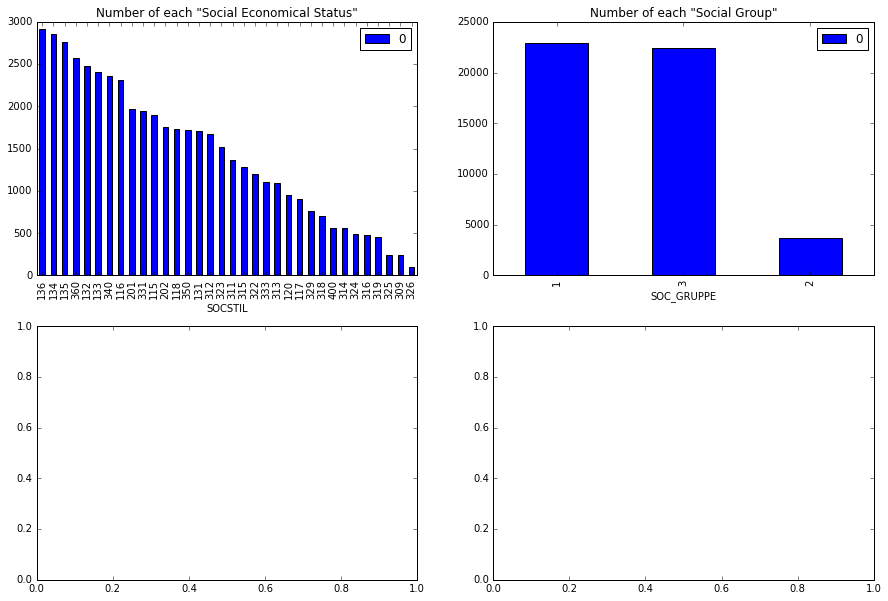

In [64]:
df1 = df.groupby(['SOCSTIL']).size()
df1 = df1.reset_index()
df1 = df1.sort_values([0],ascending = False)

df2 = df.groupby(['SOC_GRUPPE']).size()
df2 = df2.reset_index()
df2 = df2.sort_values([0],ascending = False)

fig, axes = plt.subplots(nrows=2, ncols = 2) #For some reason it doesnt work with nrows=1
df1.plot.bar(ax = axes[0,0], sharex = False, title = 'Number of each "Social Economical Status"', x='SOCSTIL', figsize=(15,10))
df2.plot.bar(ax = axes[0,1], sharex = False, title = 'Number of each "Social Group"', x='SOC_GRUPPE')
plt.show()

<b> 2.2 Identifying people within certain districts with certain socioeconomic statuses </b>

The following code is an example. This was done for every district. 

In [42]:
csvfile = pd.read_csv('Socio_Stat_Alder_Herkomst.csv')

#data1 is all of the data
data1 = pd.DataFrame(csvfile)

#data2 is data with the relevant columns (but not right socstils)
data2 = DataFrame(data1, columns=['AAR','BYDEL','SOCSTIL', 'PERSONER'])

datasetBy1 = data2[(data2['SOCSTIL'] == 133) | (data2['SOCSTIL'] == 132) | (data2['SOCSTIL'] == 134)]
datasetBy1 = datasetBy1[(datasetBy1['BYDEL'] == 1)]

print datasetBy1

        AAR  BYDEL  SOCSTIL  PERSONER
0      2013      1      132        11
1      2013      1      133         4
2      2013      1      134        34
8      2013      1      133         1
9      2013      1      134         3
16     2013      1      132       345
17     2013      1      133       206
18     2013      1      134      2401
37     2013      1      132        63
38     2013      1      133        15
39     2013      1      134       117
54     2013      1      132         6
55     2013      1      133         5
56     2013      1      134        51
70     2013      1      132      1226
71     2013      1      133       455
72     2013      1      134      1414
93     2013      1      132       279
94     2013      1      133        64
95     2013      1      134       167
110    2013      1      132        20
111    2013      1      133         7
112    2013      1      134        34
127    2013      1      132      6176
128    2013      1      133      1560
129    2013 

Since the dataset is heavily grouped meaning that each line does not represent a single individual but rather a group of people we had to separate these groups first. We did this by isolating single groups of people sharing all other attributes and then summarizing them into a single line, thus reducing the size of the dataset and making it more manageable.

In [43]:
dataset1 = data2[(data2['AAR'] == 1997) & (data2['BYDEL'] == 4) & (data2['SOCSTIL'] == 132)]
ialt132 = dataset1['PERSONER'].sum() #Antal personer i alt

dataset1 = data2[(data2['AAR'] == 1997) & (data2['BYDEL'] == 4) & (data2['SOCSTIL'] == 133)]
ialt133 = dataset1['PERSONER'].sum() #Antal personer i alt

dataset1 = data2[(data2['AAR'] == 1997) & (data2['BYDEL'] == 4) & (data2['SOCSTIL'] == 134)]
ialt134 = dataset1['PERSONER'].sum() #Antal personer i alt
print 'Vesterbro/Kgs. Enghave in 1997'
print 'People with 132 socioeconomic status:', ialt132
print 'People with 133 socioeconomic status:', ialt133
print 'People with 134 socioeconomic status:', ialt134

Vesterbro/Kgs. Enghave in 1997
People with 132 socioeconomic status: 2932
People with 133 socioeconomic status: 3053
People with 134 socioeconomic status: 9370


This same technique was used to isolate people with a specific ancestry or employment status. Overall we created five new csv files and one tsv file in order for us to create the proper visualizations.

<b>2.3 Searching for trends</b>

In order for us to get a better overview of the data we searched for overall trends within the data set.

The following code snippet displayes the high-income citizens through time in Copenhagen.

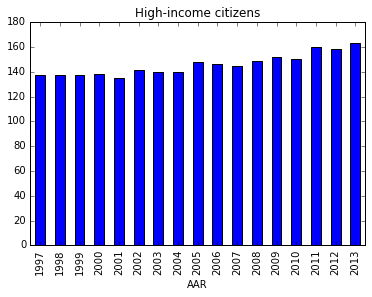

In [44]:
df5 = dataFrame[['SOC_GRUPPE', 'SOCSTIL', 'AAR', 'PERSONER', 'BYDEL']]
df10 = df5[df5['SOCSTIL'] == 132]
df10 = df10.groupby(['AAR']).size()
df10.plot.bar(title = 'High-income citizens', x = 'AAR')
plt.show()

We also looked at the development of employment status. The following code looks at employed citizens in Copenhagen through time.

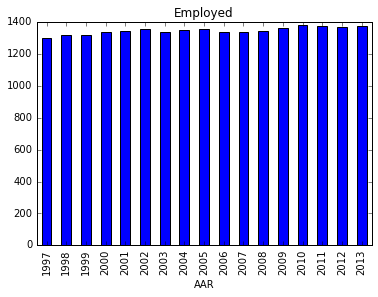

In [45]:
Beskaeftiget = df5[df5['SOC_GRUPPE'] == 1]
Beskaeftiget = Beskaeftiget.groupby(['AAR']).size()
Beskaeftiget.plot.bar(title = 'Employed', color='blue', align='center', x = 'AAR')
plt.show()

In order for us to understand the distribution of each socioeconomic status in each district we looked at the relative probabilities of seeing each type of status in the dataset.

KeyError: 'ax10'

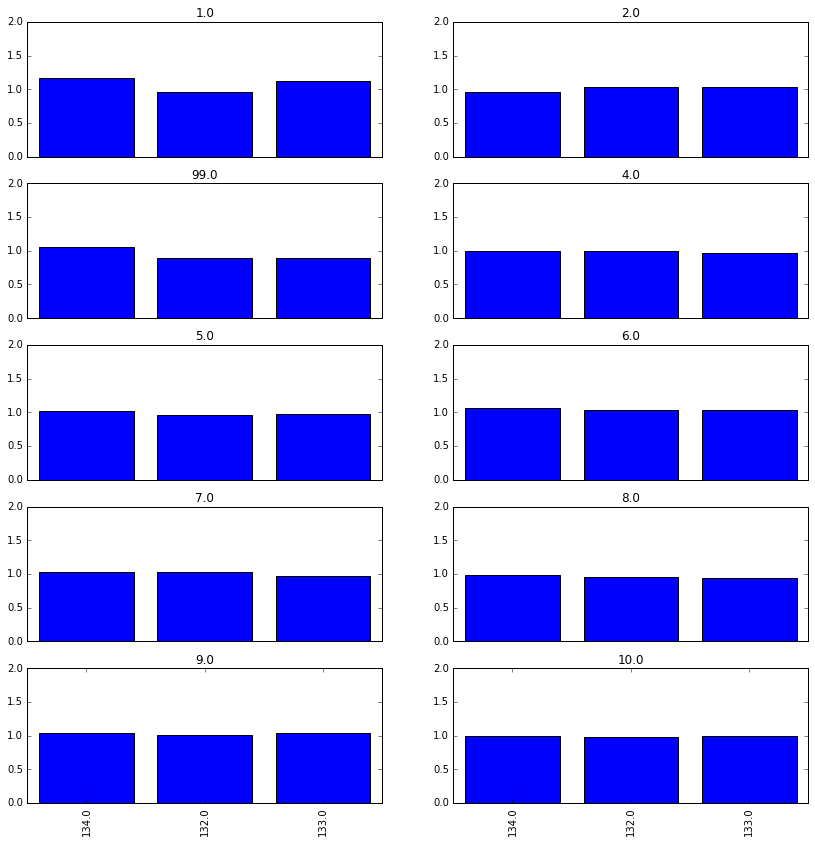

In [46]:
focusstatuses = [134, 132, 133]
df12 = dataFrame[['BYDEL', 'SOCSTIL']]
                        
#remove faulty data
df12 = df12[pd.notnull(df12['BYDEL'])]
df12 = df12.groupby(['SOCSTIL']).size()
df12 = df12.reset_index()
df12 = df12.sort_values([0],ascending = False)

count = df12[0].sum(axis=0)

df12['P(C)'] = df12[0]/count

df13 = dataFrame[['BYDEL' , 'SOCSTIL']]
df13 = df13[pd.notnull(df13['BYDEL'])]
df13 = df13.groupby(['SOCSTIL', 'BYDEL']).size()
df13 = df13.reset_index()
df13 = df13.sort_values(['BYDEL',0], ascending=False)
df13 = df13.join(df13.groupby('BYDEL')[0].sum(), on='BYDEL', rsuffix='Total')
df13['P(C|D)'] = df13['0'] / df13['0Total']
df13 = df13.rename(columns={'0': 'Count', '0Total': 'Total'})


df13['P(C)'] = df13['SOCSTIL'].map(df12.set_index('SOCSTIL')['P(C)'])
df13['Ratio'] = df13['P(C|D)'] / df13['P(C)']

import matplotlib.pyplot as plt
%matplotlib inline

f, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7), (ax8, ax9)) = plt.subplots(5, 2, figsize=(14,14))
df14 = df13[df13['SOCSTIL'].isin(focusstatuses)]
mydict = {}

for x in range(len(df14)):
    currentid = df14.iloc[x,1]
    currentvalue = df14.iloc[x,0]
    currentvalue2 = df14.iloc[x,6]
    mydict.setdefault(currentid, [])
    mydict[currentid].append((currentvalue,currentvalue2))

i = 0
for k, v in mydict.iteritems():
    x_values = []
    y_values = []
    for coord in v:
        x_values.append(coord[0])
        y_values.append(coord[1])
    indexes = np.arange(len(x_values))
    locals()['ax{0}'.format(i)].bar(indexes, y_values, align='center', color='blue')
    locals()['ax{0}'.format(i)].set_ylim([0,2])
    locals()['ax{0}'.format(i)].set_title('%s' % k)
    if (i >= 8):
        locals()['ax{0}'.format(i)].set_xticks(range(len(x_values)))
        locals()['ax{0}'.format(i)].set_xticklabels(x_values, rotation='vertical')
    else:
        locals()['ax{0}'.format(i)].get_xaxis().set_ticks([])
    i += 1

plt.tight_layout()
plt.show()

This however yielded somewhat evenly distributed results which we at that time didn't think further of. Data after all does not allways give you the results you want. This will be adressed in the discussion section. 

<h2>3. Theory</h2>

<b> 3.1 Machine Learning Tools </b>

Like explained on the website, we had some troubles deciding what kind of machine learning methods to use, due to the nature of our dataset. We ended up going with a descision tree, looking at age groups as a target and social group, civil status and origin as features. Chosing this model makes sense because the age of a person can be a clear indication of what kind of income you have. This is espcially true if you are for example under 25 or over 65, due to people under 25 still soing their education or having low paying jobs due to lack of education and job skills. People over 65 are often retired and therefore do not have that high income. 

Below is the implementation of the Decision tree model:

In [6]:
from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [7]:
df = pd.read_csv('Socio_Stat_Alder_Herkomst.csv')

In [8]:
print("df.head()", df.head(), sep="\n", end="\n\n")
print("df.tail()", df.tail(), sep="\n", end="\n\n")

df.head()
    AAR  BYDEL  ALDERSKAT  IETYPE  SOC_GRUPPE  SOCSTIL  PERSONER
0  2013      1          1       1           1      132        11
1  2013      1          1       1           1      133         4
2  2013      1          1       1           1      134        34
3  2013      1          1       1           1      135        29
4  2013      1          1       1           1      136        69

df.tail()
        AAR  BYDEL  ALDERSKAT  IETYPE  SOC_GRUPPE  SOCSTIL  PERSONER
49039  1997     99          6       1           3      329        18
49040  1997     99          6       1           3      360         6
49041  1997     99          6       2           3      329         3
49042  1997     99          6       2           3      340         1
49043  1997     99          6       2           3      360        16



In [9]:
print("Social group types:", df["ALDERSKAT"].unique(), sep="\n")

Social group types:
[1 2 3 4 5 6]


In [10]:
# This is done incase we are dealing with non-numbers.
def encode_target(df, target_column):
   
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [11]:
df2, targets = encode_target(df, "ALDERSKAT")
print("df2.head()", df2[["Target", "ALDERSKAT"]].head(),
      sep="\n", end="\n\n")
print("df2.tail()", df2[["Target", "ALDERSKAT"]].tail(),
      sep="\n", end="\n\n")
print("Targets", targets, sep="\n", end="\n\n")

df2.head()
   Target  ALDERSKAT
0       0          1
1       0          1
2       0          1
3       0          1
4       0          1

df2.tail()
       Target  ALDERSKAT
49039       5          6
49040       5          6
49041       5          6
49042       5          6
49043       5          6

Targets
[1 2 3 4 5 6]



In [12]:
features = list(df2.columns[3:6])
print("Features:", features, sep="\n")

Features:
['IETYPE', 'SOC_GRUPPE', 'SOCSTIL']


In [13]:
# Setting to split if > 5k samples.
y = df2["Target"]
X = df2[features]
dt = DecisionTreeClassifier(min_samples_split=5000, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=5000, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

In [14]:
# Visualizing the tree. Remember you need to have the GraphViz installed.
def visualize_tree(tree, feature_names):
   
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [15]:
visualize_tree(dt, features)

Here is the picture if you dont have GraphViz installed:
[Image of Tree](http://postimg.org/image/ub6pm6w5t/)

In [19]:
#reference: http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html

The second model is a k-means clustering. For reasons that are unclear to us, the model did not work in iPython, which is why we did it using Matlab instead. Using this model was more of a wanting to show that we know what it is, and that we could explain why it does not really work on our data. We wanted to make the 2 different machine learning methods nessesary, and decided that we might as well show this as our second one, as we didnt think that any of the others would fit any better on our focus. 
K-means clustering is used for grouping data-points based on a the mean of a cluster. Centroids are calculated for each cluster and of course visualizes the center of data points beloning to it. 
The reason why it does not work can easily be see on the graph. Like explained earlier our data is classified already. The only attribute not in a close to binary form is the PERSONER attribe, which descibes how many people are in a specific category. This is the reason for the graph looking grid-like. When that is the case it can be very hard to differentiate the data points. Additionally the fact that the dataset we are using is categorized makes the centroids position more dependent on the attribte on the x-axis (of the graph below) rather that the data values. 

Below is the resulting graph:

<img src="MartinKPedersen.github.io/kmeans.jpg">
If it does not work the graph can also be found [Here](http://s32.postimg.org/9b63f8dzp/kmeans.jpg) 

<b> 3.2 Model Selection </b>

In the k-means clustering model the data was split randomly into 80/20% training and test data sets. Cross-validation was used to evaluate how the model did on the test data.

<b> 3.3 Model Performance </b>

The descision tree we though was an interesting way to investigate how the attributes affected each other. It can also be used predictively if a certain case needs to be estimated. It did result similarly to what we expected and can be used to tell an interesting story to the non-scientific reader of our website. 

The k-means clustering results were due to the data inconclusive. We were in doubt if it should be included on the website, as it would not add anything, therefore we chose to keep it in the explainer notebook and just mention it for the interested reader, who can then come here and read about it.
The results were very much as expected. We played around with the model and which attributes to include. The ones chosen we thought nicely illustrated our point.

<h2>4. Visualizations</h2>

<b> 4.1 Mouseover Labels </b>

The scatter plot along with the grouped bar chart has mouseover labels on them making it possible for the user to investigate the exact data values. This helps conveying the message of the visualization and delivers interactivity which enhances user engagement. 

<b>4.2 Scatter plot </b>

We chose to use the scatter plot to visualize an overarching trend within the data. Although it was taken more or less directly from classes it succeeded in its purpose of illustrating a rise in high-income citizens. The scatter plot was created with a y-axis of high-income citizens, a x-axis og low-income citizens and a radius displaying the total number of citizens within those socioeconomic groups. 


<b>4.3 Grouped bar chart</b>

The grouped bar chart displays the developement in three groups over time. Namely the 1. Employees at the highest level, 2. Employees at medium level, 3. Employees at ground level. 

The idea for a grouped bar chart came to us after we decided to focus on the three subgroups, since it gave us an opportunity to visualize three distinct developments over time. 

Doing the transition on all three subgroups at once appeared confusing and made it difficult to realise which subgroup had underhone which development. As a result we created the visualization so that the transition happens on one subgroup at a time. This is an effective way of making transitions in grouped charts since it highlights changes in one attribute at a time.

<b>4.4 Stacked bar chart</b>

The stacked bar chart visualizes the distribution of age groups within each Copenhagen district in 1997 and 2013.

The stacked bar chart is effective at visualizing any kind of distribution since it is done in percentage. Bar charts are also easy for the human eye to recognize since we a very capable of estimating differences in hights. We chose to make the stacked bar chart for 1997 and 2013 respectively in order to visualize the difference between the starting point and end point of our data. 

<b>4.5 Donut chart</b>

The donut charts displays the distribution of immigrants and danish citizens within the districts of Vest Amager and Bispebjerg. 

The donut charts are, as with all pie charts, harder for the human eye to read since we are worse at observing angles as opposed to heights. However, we chose this because we only had to illustrate three values that we knew would be heavily skewed towards one of them - the danish citizens. At first we went with a pie chart, but it was simply too boring to look at. The donut chart however offers the capability of highlighting something in the middle of the figure. We used this white space to visualize a percentage of immigrants in that specific year and district. This also serves the purpose of eliminating any lack of understandability since the angle-based diagram now is supported by text. 

The reason we chose to only visualize two districts was because visualizing all districts simply became too confusing. We even tried doing a multiple pie chart but it created more clutter than clarity.


<h2>5. Discussion</h2>

<b> 5.1 The good </b>

The website is what we as a group is the most satisfied with. Its structure and content is somewhat like how a real project website would look like. It is also quite interesting to look at how some of the data turned out. The difference between districts is not as apparent as we had thought. There is not a single district that has had a dramatic increase in low-salary citizens, which was something that we expected due to our personal kn. Furthermore the spike in high-income citizens and the lowering in medium-income citizens in 2010 is something that would be interesting to investigate further.  

The visualizations we chose turned out to be quite good. They look smooth and they each serve their purpose as intended. We also believe that we managed to put in quite a lot of visualizations which makes our intended message more understandable and supported. It is very interesting to see how simple visualizations can create such clarity in a statistical analysis.

<b> 5.2 The bad </b>

This project suffers from one devious mistake: That we had to change our data set. Since we did our initial data exploration on a different dataset the exploration we could manage timewise on the new one became rather limited. This resulting in us overlooking the severity of having each line in the dataset devoted to a group of people. As a result some of our statistical work became problematic, which we unfortunately realized too late. 

This is true for the k-means method which as described in the theory section is not for data categorized as ours. Furthermore it included our relative probability analysis, which could have taken the project in a different direction had been done correctly.

The good that came from this is that we have now learned how important it is to be sceptic towards datasets before choosing to work with it. 

As a result of this problematic development process our project is lacking statistical evidence. We understand that this is very important and would in the future never release such a website. However for this class we have included machine learning methods to illustrate that we understand the concepts and can perform such methods. 
